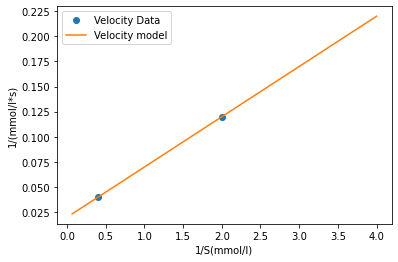

The x-intercept is: 0.02
The slope is:  0.05
The value of Vm is: 49.939 mmol/L*s
The value of Km is: 2.495 mmol/L
The surface concentration at steady state is: 0.0003 mmol/cm2
The value of Da is: 9.988 > 1 this process is diffusion limiting
0.0024950000000000003
0.12484750000000001


In [1]:
import numpy as np
from sympy.solvers import solve
from sympy import Symbol
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# x-axis
s0 = np.array([(1/0.25),(1/0.5),(1/2.5),(1/5),(1/10),(1/15)]).reshape(-1,1)

# y-axis
V = np.array([(1/4.55),(1/8.33),(1/25),(1/33.33),(1/40),(1/42.86)])

### Fitting data 
model = LinearRegression().fit(s0,V)
Vmodel = []

for substrateConc in s0:
    modelEqnSoln = model.coef_*substrateConc + model.intercept_
    Vmodel.append(modelEqnSoln)
np.array(Vmodel)
###

### Plotting and regressing using "Lineweaver-Burk plot" based
plt.plot(s0,V,'o', label = "Velocity Data")
plt.plot(s0,Vmodel, label = "Velocity model")
plt.legend()
plt.xlabel('1/S(mmol/l)')
plt.ylabel('1/(mmol/l*s)')
plt.show()
###

# Two solutions possible selecting positive value: Vm = 1/[x-intercept] , km = [slope]*(1/[x-intercept])   
### Printing results
print('The x-intercept is:',round(model.intercept_,3))
print('The slope is: ',round(model.coef_[0],3))
print('The value of Vm is:',round(1/model.intercept_,3),'mmol/L*s')
print('The value of Km is:',(round(model.coef_[0]*1/model.intercept_,3)),'mmol/L')
###

### Variables and converting Km/Vm: (mmol/L)*10^-3 => mmol/cm3 , E0: (g/L) = (mg/cm3)
Ss = Symbol('Ss'); Kl = 0.5; Sb = 25*10**-3; El = 5; E0 = 2; 
Km = round(model.coef_[0]*1/model.intercept_,3)*10**-3
Vm = round(1/model.intercept_,3)*10**-3
###

# Calculating Vm'(mmol/cm2*s)
VmPrime = ((Vm/E0)*El)

# Solving for surface concentration(mmol/cm2)
Surface_Conc = solve(Kl*(Sb -Ss) -
                     (VmPrime*Ss)/(Km+Ss))

# Calculating Da
Da = VmPrime/((Kl)*(Sb))

print('The surface concentration at steady state is:',round(Surface_Conc[1],4),'mmol/cm2')
print('The value of Da is:',round(Da,3),'> 1 this process is diffusion limiting')
print(Km)
print(VmPrime)